C:\Users\danid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


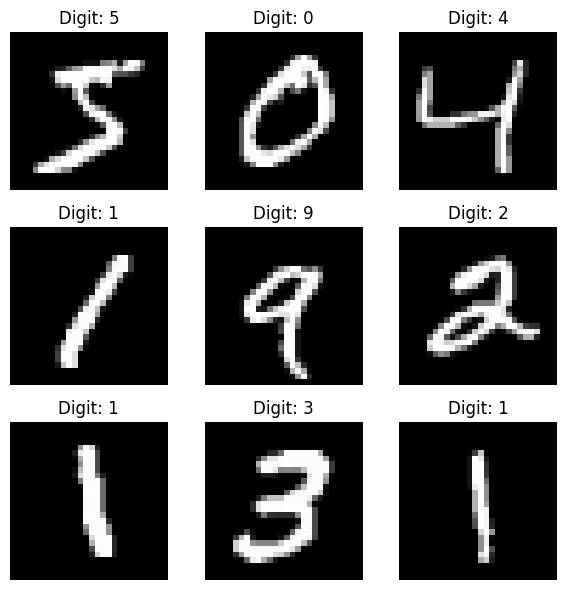

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# getting the data from
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

# converting to numpy to being consistent with indexes
x = x.to_numpy() / 255.0  # and normalizing the data
y = y.to_numpy()
y_int = y.astype(int)  # making sure the labels are integers

# Set up a grid of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    if i < 9:
        img = x[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Digit: {y[i]}")
        ax.axis('off')
    else:
        ax.axis('off') 

plt.tight_layout()
plt.show()
  

In [23]:
def predict_digit(x, classifiers):
    prediction = [np.dot(x, weight) for weight in classifiers]
    return np.argmax(prediction)


def evaluate_accuracy(x_test, y_test, classifiers):
    correct_predictions = 0

    for x, y_true in zip(x_test, y_test):
        predicted_digit = predict_digit(x, classifiers)
        if predicted_digit == np.argmax(y_true):
            correct_predictions += 1

    accuracy = correct_predictions / len(x_test)
    return accuracy


def pocket(x_train, y_train, epochs=100):
    best_acc = 0.0
    n_features = x_train.shape[1]
    weights = np.random.rand(n_features) * 0.01
    best_weights = np.copy(weights)
    accuracies = []
    for epoch in range(epochs):
        weights = pla(x_train, y_train, weights)
        curr_acc = calc_acc(x_train, y_train, weights)
        accuracies.append(curr_acc*100)
        if curr_acc > best_acc:
            best_acc = curr_acc
            best_weights = np.copy(weights)
    return best_weights, accuracies


def pla(x_train, y_train, w_weights):
    for x, y in zip(x_train, y_train):
        prediction = np.dot(x, w_weights)
        # print("prediction is: ", prediction, " And y is: ", y)
        if prediction * y <= 0:
            w_weights = w_weights + x * y

    return w_weights


def calc_acc(x_data, y_data, w_weights):
    correct_predictions = 0
    total_predictions = x_data.shape[0]

    for x, y in zip(x_data, y_data):
        prediction = np.sign(np.dot(x, w_weights))
        if prediction == y:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy


def transform_labels_for_digit(one_hot_labels, digit):
    # Extract the column corresponding to the specified digit
    binary_labels = one_hot_labels[:, digit]
    # Transform 0s to -1s and keep 1s as is
    binary_labels = binary_labels * 2 - 1
    return binary_labels


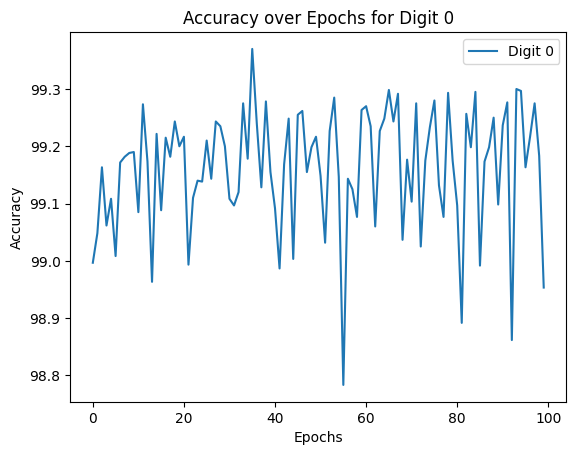

The accuracy for digit:  0
Accuracy on training data: 99.37
Accuracy on test data: 99.15


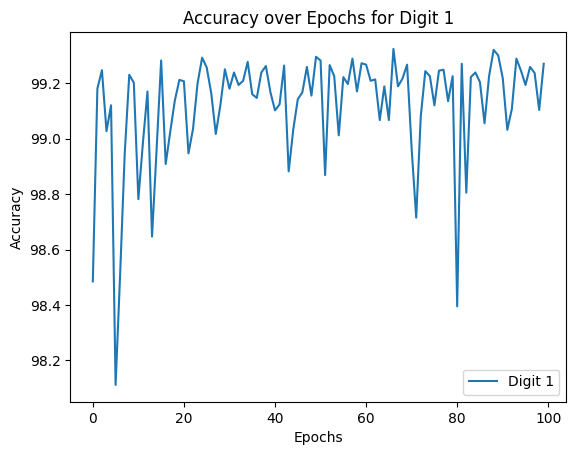

The accuracy for digit:  1
Accuracy on training data: 99.32333333333332
Accuracy on test data: 99.18


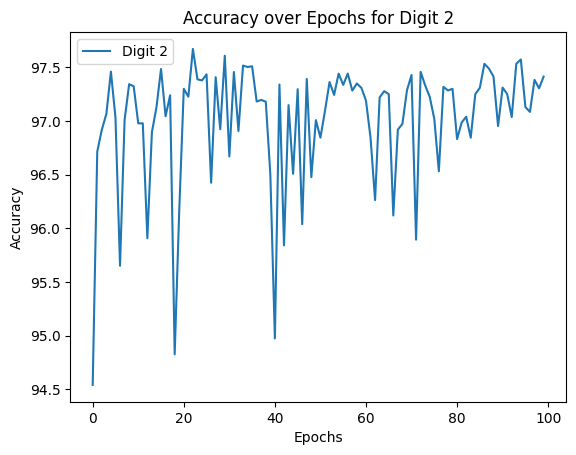

The accuracy for digit:  2
Accuracy on training data: 97.67
Accuracy on test data: 97.41


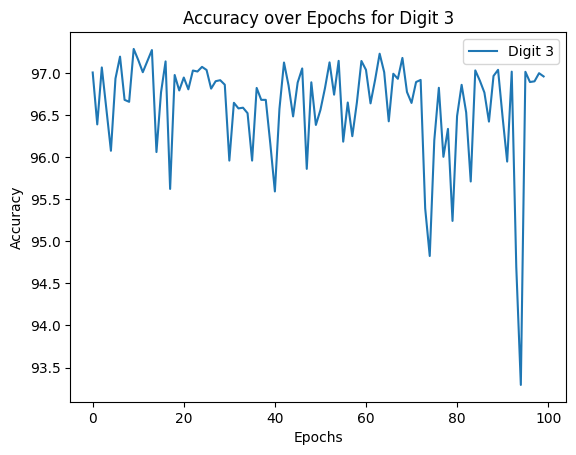

The accuracy for digit:  3
Accuracy on training data: 97.285
Accuracy on test data: 96.88


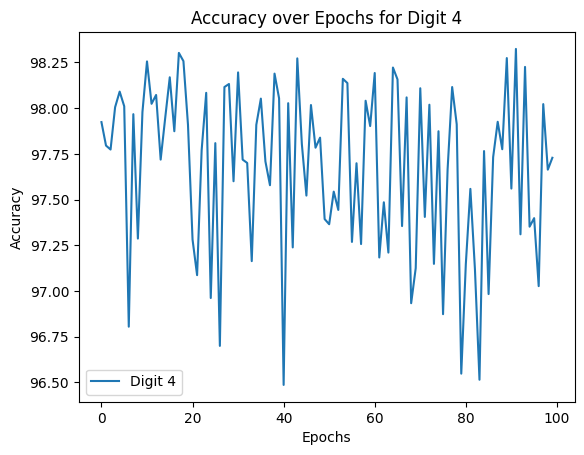

The accuracy for digit:  4
Accuracy on training data: 98.32333333333332
Accuracy on test data: 98.08


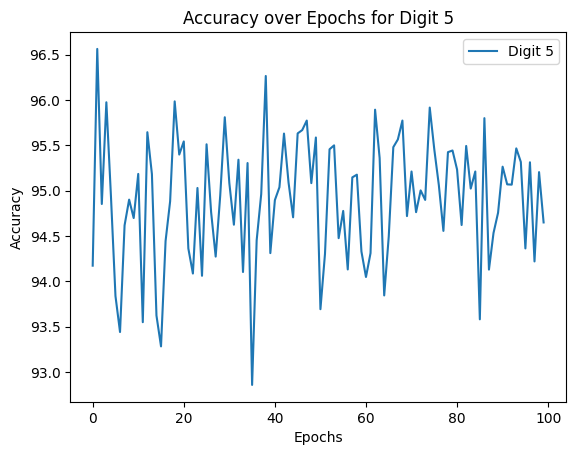

The accuracy for digit:  5
Accuracy on training data: 96.56333333333333
Accuracy on test data: 96.23


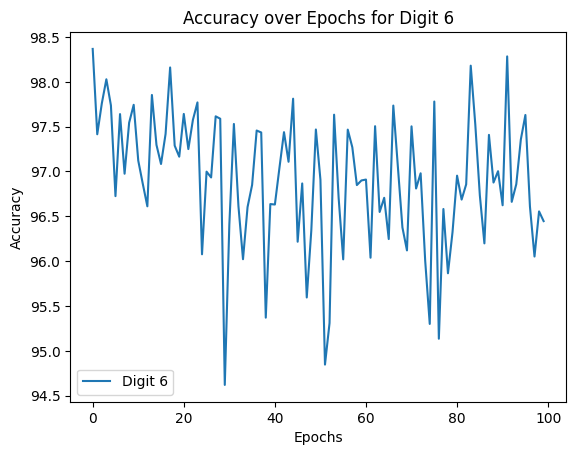

The accuracy for digit:  6
Accuracy on training data: 98.36666666666667
Accuracy on test data: 98.25


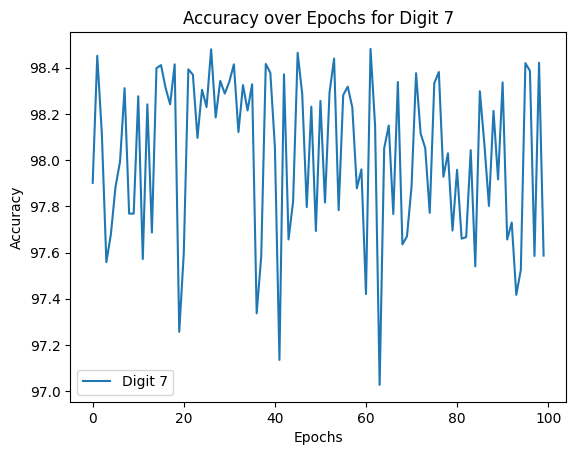

The accuracy for digit:  7
Accuracy on training data: 98.48166666666667
Accuracy on test data: 98.26


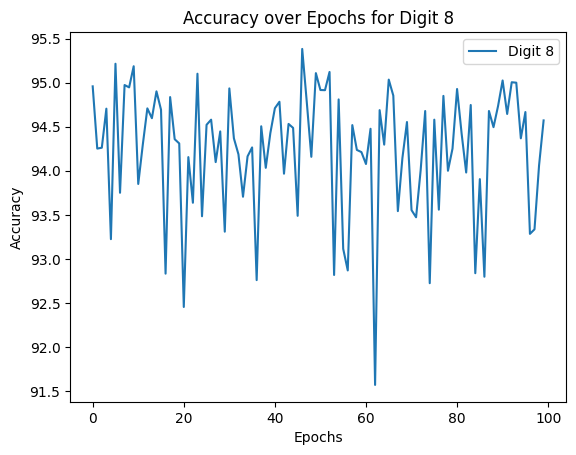

The accuracy for digit:  8
Accuracy on training data: 95.38333333333333
Accuracy on test data: 94.93


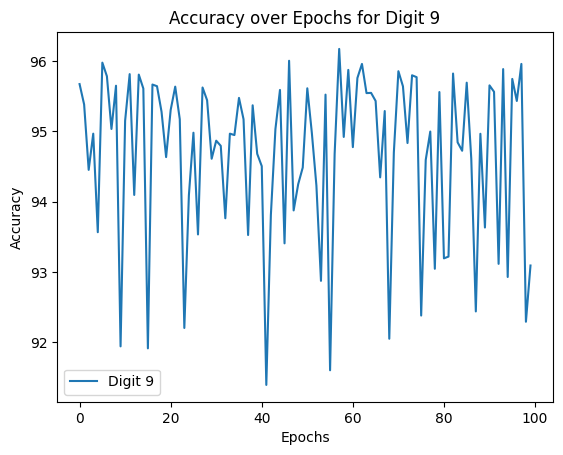

The accuracy for digit:  9
Accuracy on training data: 96.17333333333333
Accuracy on test data: 95.94
Overall Accuracy: 89.55%


In [26]:
# converting labels to one hot vectors as instructed in the assigment
one_hot_labels = np.zeros((y_int.shape[0], 10))
for i, label in enumerate(y_int):
    one_hot_labels[i, label] = 1

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, one_hot_labels, train_size=60000, test_size=10000,
                                                        random_state=42)
# adding the bias term
bias = np.ones((x_train.shape[0], 1))
x_train_bias = np.hstack((bias, x_train))

bias_test = np.ones((x_test.shape[0], 1))
x_test_bias = np.hstack((bias_test, x_test))

classifiers = []
for digit in range(10):
    y_train_binary = transform_labels_for_digit(y_train, digit)
    y_test_binary = transform_labels_for_digit(y_test, digit)

    # Train the classifier for the digits
    weights = pocket(x_train_bias, y_train_binary)
    classifiers.append(weights[0])
    accuracies = weights[1]
    plt.figure()  # Create a new figure for each digit
    plt.plot(accuracies, label=f"Digit {digit}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy over Epochs for Digit {digit}")
    plt.legend()
    plt.show()

    print("The accuracy for digit: ", digit)
    # Evaluate the classifier on training data
    acc_train = calc_acc(x_train_bias, y_train_binary, weights[0])
    print(f"Accuracy on training data: {acc_train * 100}")

    
overall_accuracy = evaluate_accuracy(x_test_bias, y_test, classifiers)
print(f"Overall Accuracy: {overall_accuracy * 100}%")




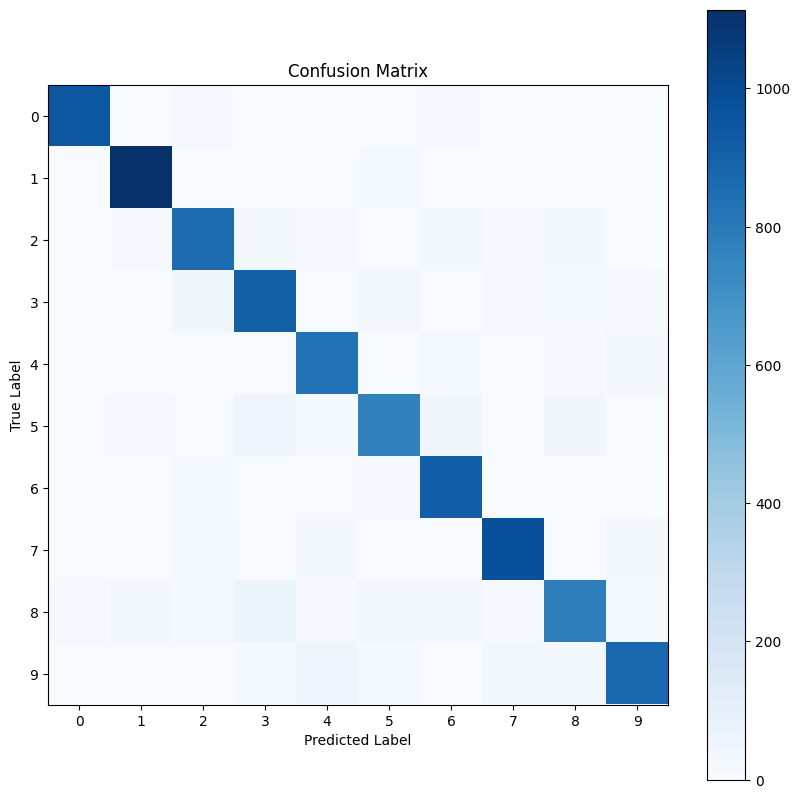

In [29]:
def get_test_predictions(x_test, classifiers):
    predictions = []
    for x in x_test:
        predicted_digit = predict_digit(x, classifiers)
        predictions.append(predicted_digit)
    return predictions

y_pred = get_test_predictions(x_test_bias, classifiers)
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()